In [1]:
#autoreload
%load_ext autoreload
%autoreload 2


In [28]:
# Crear una instancia del ambiente
import numpy as np
import matplotlib.pyplot as plt
from agente import AgenteQLearning
#from DQN import AgenteDQN
from ambiente import AmbienteDiezMil
from template import Validador
#from jugador import JugadorFromDQNPolicy
from IPython.display import clear_output
from tqdm import tqdm
from utils import RangeSnaper

In [29]:
# Inicialización del gráfico
def train(epochs, episodios, alpha, gamma, epsilon, rs, early_stop = 20, seed = 42, recompensa_i: int = 0, penalidad_i: int = 0, multiplicador_recompensa: int = 1):   
    seed = seed
    np.random.seed(seed)

    ambiente = AmbienteDiezMil(rs=rs, recompensa_i=recompensa_i, penalidad_i=penalidad_i, multiplicador_recompensa=multiplicador_recompensa)

    # Crear un agente de Q-learning
    agente = AgenteQLearning(ambiente, alpha=alpha, gamma=gamma, epsilon=epsilon)


    vals_normal = []
    best_validation = 30
    best_policy = None
    epochs_sin_mejora = 0
    # Entrenar al agente con un número de episodios
    for _ in range(epochs):
        agente.entrenar(episodios, verbose=False)
        if _ % 2 == 0:
            validador = Validador(AmbienteDiezMil(rs=rs, recompensa_i=recompensa_i, penalidad_i=penalidad_i, multiplicador_recompensa=multiplicador_recompensa))
            vals_normal.append(validador.validar_politica(agente.q_table2pol(), 300))
            if vals_normal[-1] < best_validation:
                best_validation = vals_normal[-1]
                best_policy = agente.q_table2pol()
                epochs_sin_mejora = 0
            else:
                epochs_sin_mejora += 1
                if epochs_sin_mejora == early_stop:
                    break
    
    return best_validation, best_policy, vals_normal

In [12]:
bv, bp, vn = train(100, 100, 0.1, 0.9, 0.1, RangeSnaper())
bv

np.float64(21.133333333333333)

In [31]:
bv, bp, vn = train(
    100, 100, 0.1, 0.9, 0.1, RangeSnaper(), penalidad_i=2, recompensa_i=3
)
bv

np.float64(21.386666666666667)

In [14]:
RANGOS1 = [
    (0, 1),
    (1, 250),
    (250, 500),
    (500, 750),
    (750, 1000),
    (1000, 2000),
    (2000, 5000),
    (5000, 10000),
    (10000, int(1e10)),
]

RANGOS2 = [
    (0, 1),
    (1, 50),
    (50, 100),
    (100, 150),
    (150, 200),
    (200, 250),
    (250, 350),
    (350, 500),
    (500, 750),
    (750, 1000),
    (1000, 2000),
    (2000, 5000),
    (5000, 10000),
    (10000, int(1e10)),
]

RANGOS3 = [
    (0, 1),
    (1, 50),
    (50, 100),
    (100, 150),
    (150, 200),
    (200, 250),
    (250, 350),
    (350, 500),
    (500, 750),
    (750, 1000),
    (1000, 2000),
    (2000, 4000),
    (4000, 6000),
    (6000, 8000),
    (8000, 10000),
    (10000, int(1e10)),
]

RANGOS4 = [
    (0, 1),
    (1, 250),
    (250, 500),
    (500, 750),
    (750, 1000),
    (1000, 5000),
    (5000, int(1e10)),
]

In [20]:
# For Rangos5, approximate the distribution of points per turn

from diezmil import JuegoDiezMil
from jugador import JugadorFromPolicy

points_per_turn = []
games = 10000
for i in tqdm(range(1, games)):
    ambiente = AmbienteDiezMil(rs=RangeSnaper())
    jugador = JugadorFromPolicy(bp, rs=RangeSnaper())
    juego = JuegoDiezMil(jugador)
    puntos_turno = list(juego.jugar(verbose=False))
    points_per_turn += puntos_turno

points_per_turn

100%|██████████| 9999/9999 [00:04<00:00, 2322.66it/s]


[150,
 450,
 4100,
 1200,
 1600,
 200,
 200,
 600,
 0,
 300,
 0,
 0,
 300,
 1550,
 550,
 350,
 300,
 250,
 200,
 0,
 1050,
 0,
 400,
 250,
 300,
 550,
 300,
 600,
 300,
 1050,
 250,
 300,
 0,
 150,
 0,
 0,
 300,
 250,
 350,
 300,
 300,
 550,
 300,
 1750,
 550,
 1100,
 200,
 650,
 550,
 350,
 700,
 350,
 450,
 100,
 3400,
 1200,
 450,
 200,
 0,
 300,
 350,
 1650,
 0,
 300,
 400,
 1200,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 300,
 450,
 250,
 400,
 1100,
 1700,
 1100,
 300,
 0,
 1050,
 900,
 650,
 650,
 0,
 350,
 600,
 700,
 200,
 300,
 400,
 300,
 250,
 500,
 1600,
 200,
 1150,
 0,
 350,
 200,
 0,
 500,
 300,
 300,
 400,
 300,
 1050,
 300,
 0,
 150,
 700,
 4500,
 0,
 300,
 450,
 450,
 200,
 300,
 1600,
 0,
 1100,
 0,
 550,
 0,
 2250,
 500,
 250,
 1600,
 300,
 700,
 550,
 0,
 300,
 600,
 200,
 200,
 700,
 250,
 300,
 0,
 1800,
 300,
 250,
 400,
 500,
 300,
 650,
 550,
 300,
 0,
 1050,
 0,
 750,
 300,
 500,
 0,
 1100,
 400,
 550,
 0,
 1000,
 400,
 0,
 0,
 0,
 0,
 1150,
 300,
 250,
 200,
 0,
 250,
 

[(0, 1),
 (np.float64(0.0), np.float64(150.0)),
 (np.float64(150.0), np.float64(250.0)),
 (np.float64(250.0), np.float64(250.0)),
 (np.float64(250.0), np.float64(300.0)),
 (np.float64(300.0), np.float64(350.0)),
 (np.float64(350.0), np.float64(500.0)),
 (np.float64(500.0), np.float64(650.0)),
 (np.float64(650.0), np.float64(1100.0)),
 (np.float64(1100.0), np.float64(13000.0)),
 (np.float64(13000.0), 10000000000)]

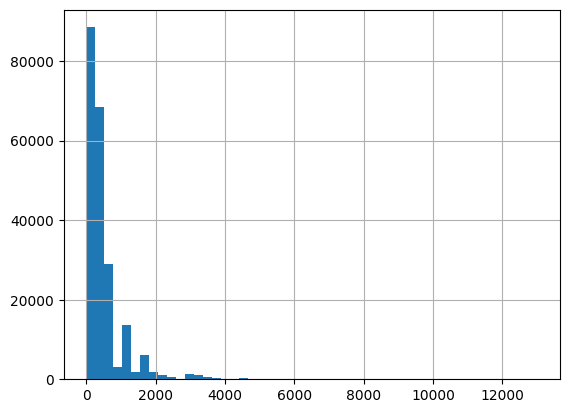

In [38]:
import pandas as pd
points_obs = pd.Series(points_per_turn)
points_obs.hist(bins=50)

# Quantiles for the distribution
RANGOS5 = [
    (0, 1),
] + [
    (points_obs.quantile(q), points_obs.quantile(q+0.1))
    for q in np.linspace(0.1, 0.9, 9)
] + [
    (points_obs.quantile(1), int(1e10))
]

RANGOS5

In [39]:
RANGOS5 = [
    (0, 1),
    (0.0, 150.0),
    (150.0, 250.0),
    (250.0, 250.0),
    (250.0, 300.0),
    (300.0, 350.0),
    (350.0, 500.0),
    (500.0, 650.0),
    (650.0, 1100.0),
    (1100.0, 10000.0),
    (10000.0, int(1e10)),
]

In [47]:
# RANGOS6 splits each of the previous ranges in n
n = 2
RANGOS6 = [RANGOS5[0]]
for r in RANGOS5[1:-1]:
    RANGOS6 += [
        (r[0] + i * (r[1] - r[0]) / n, r[0] + (i + 1) * (r[1] - r[0]) / n)
        for i in range(n)
    ]
RANGOS6[1] = (1, RANGOS6[1][1])
RANGOS6 += [RANGOS5[-1]]

RANGOS6

[(0, 1),
 (1, 75.0),
 (75.0, 150.0),
 (150.0, 200.0),
 (200.0, 250.0),
 (250.0, 250.0),
 (250.0, 250.0),
 (250.0, 275.0),
 (275.0, 300.0),
 (300.0, 325.0),
 (325.0, 350.0),
 (350.0, 425.0),
 (425.0, 500.0),
 (500.0, 575.0),
 (575.0, 650.0),
 (650.0, 875.0),
 (875.0, 1100.0),
 (1100.0, 5550.0),
 (5550.0, 10000.0),
 (10000.0, 10000000000)]

In [40]:
bv, bp, vn = train(100, 100, 0.1, 0.9, 0.1, RangeSnaper(RANGOS5))
bv

np.float64(21.346666666666668)

In [48]:
bv, bp, vn = train(100, 100, 0.1, 0.9, 0.1, RangeSnaper(RANGOS6))
bv

np.float64(21.563333333333333)

In [52]:
#hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def objective(params):
    # alpha = params["alpha"]
    # gamma = params["gamma"]
    # epsilon = params["epsilon"]
    # #reward = params["reward"]
    # rango = params["rango"]

    # best_validation, best_policy, _ = train(epochs=500, episodios=1000, alpha=alpha, gamma=gamma, epsilon=epsilon, rs=RangeSnaper(rango))
    best_validation, best_policy, _ = train(epochs=500, episodios=1000, **params)
    
    return {
        "loss": best_validation,
        "status": STATUS_OK,
        "best_policy": best_policy
    }

space = {
    "alpha": hp.uniform("alpha", 0.0, 1.0),
    "gamma": hp.uniform("gamma", 0.0, 1.0),
    "epsilon": hp.uniform("epsilon", 0.01, 0.2),
    "rs": hp.choice("rango", [RangeSnaper(rs) for rs in [RANGOS1, RANGOS2, RANGOS4, RANGOS5, RANGOS6]]),
    "recompensa_i": hp.choice("recompensa_i", [0, 1, 2, 3, 5]),
    "penalidad_i": hp.choice("penalidad_i", [0, 1, 2, 3, 5]),
    "multiplicador_recompensa": hp.choice("multiplicador_recompensa", [0.5, 1, 2, 5, 10])

}

trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=200, trials=trials, verbose=1)
print(best)


  0%|          | 0/200 [00:00<?, ?trial/s, best loss=?]

In [ ]:
def getBestModelfromTrials(trials):
    valid_trial_list = [trial for trial in trials
                            if STATUS_OK == trial['result']['status']]
    losses = [ float(trial['result']['loss']) for trial in valid_trial_list]
    index_having_minumum_loss = np.argmin(losses)
    best_trial_obj = valid_trial_list[index_having_minumum_loss]
    return best_trial_obj['result']['best_policy']

best_policy = getBestModelfromTrials(trials)

In [ ]:
validador = Validador(AmbienteDiezMil(rs=RangeSnaper()))
(validador.validar_politica(best_policy, 300))
            

21.073333333333334

In [ ]:
bv, bp , _ =train(100, 1000, best["alpha"], best["gamma"], best["epsilon"], RangeSnaper())
validador = Validador(AmbienteDiezMil(rs=RangeSnaper()))
(validador.validar_politica(bp, 300)), bv 

(21.67, 21.14)

Parametros a definir:
Recompensa = {
    0: (1 si gana, 0 si suma, -1 si no suma),
    1:  (1 si suma, -1 si no suma),
    2: (puntos si suma, -puntos si no suma),
    3: (puntos/#tiros si suma, -puntos/#tiros si no suma),
}

Rango = RANGOS 1, RANGOS2, RANGOS3
Alpha = [0,1]
Gamma = [0,1]
Epsilon = [0,1]


In [4]:
from jugador import JugadorAleatorio
from template import Validador


val = Validador(ambiente)
val_count = 1000
avg = val.validar_politica(agente.q_table2pol(), val_count)
print(f"Validación DeepPurple: {avg}")

val_rand = Validador(ambiente)
jugador = JugadorAleatorio("random")
avg_rand = val_rand.validar_jugador(jugador, val_count)
print(f"Validación Random: {avg_rand}")

Validación DeepPurple: 25.066
Validación Random: 26.927


In [ ]:
%matplotlib inline
import time
# import pylab as pl
from IPython import display


ambiente = AmbienteDiezMil()

# Crear un agente de Q-learning
agente = AgenteQLearning(ambiente)

vals = []

for i, val in enumerate(agente.entrenar(episodios, verbose=True)):
    vals.append(val)
    plt.figure(figsize=(10, 5))
    plt.plot(vals)
    display.clear_output(wait=True)
    # display.display(pl.gcf())
    plt.show()